# LAB 3, Variant 5

In [137]:
(10 + 4) % 5 + 1

5

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv("C:\\Users\\happy\\Documents\\University\\Semester5\\DataPython\\Material\\Lab3\\NationalNames.csv")

In [2]:
df.tail(8) #2

,Id,Name,Year,Gender,Count
1825425,1825426,Zo,2014,M,5
1825426,1825427,Zyeir,2014,M,5
1825427,1825428,Zyel,2014,M,5
1825428,1825429,Zykeem,2014,M,5
1825429,1825430,Zymeer,2014,M,5
1825430,1825431,Zymiere,2014,M,5
1825431,1825432,Zyran,2014,M,5
1825432,1825433,Zyrin,2014,M,5


In [3]:
df.describe() #4

,Id,Year,Count
count,1.825433e+06,1.825433e+06,1.825433e+06
mean,9.127170e+05,1.972620e+03,1.846879e+02
std,5.269573e+05,3.352891e+01,1.566711e+03
min,1.000000e+00,1.880000e+03,5.000000e+00
25%,4.563590e+05,1.949000e+03,7.000000e+00
50%,9.127170e+05,1.982000e+03,1.200000e+01
75%,1.369075e+06,2.001000e+03,3.200000e+01
max,1.825433e+06,2.014000e+03,9.968000e+04


In [4]:
df.groupby('Gender')[['Name']].nunique() #6

,Name
Gender,
F,64911
M,39199


In [5]:
df[(df['Gender'] == 'M') & (df['Year'] == 2010)].head(5) #7

,Id,Name,Year,Gender,Count
1677392,1677393,Jacob,2010,M,22082
1677393,1677394,Ethan,2010,M,17985
1677394,1677395,Michael,2010,M,17308
1677395,1677396,Jayden,2010,M,17152
1677396,1677397,William,2010,M,17030


In [6]:
df[df['Count'] == df['Count'].min()]['Id'].count() #9

254615

In [7]:
df.groupby('Year')[['Name']].nunique().head(5) #10

,Name
Year,
1880,1889
1881,1830
1882,2012
1883,1962
1884,2158


In [8]:
df.groupby('Year')[['Count']].sum().head(5) #15

,Count
Year,
1880,201484
1881,192699
1882,221538
1883,216950
1884,243467


In [9]:
df.groupby('Year')[['Count', 'Year']].agg({'Count' : 'sum'}).loc[lambda x: x['Count'].idxmax()].name #16

1957

In [10]:
df.groupby(['Year', 'Gender'])[['Count']].sum().unstack().head(5) #17

Count        
Gender       F       M
Year                  
1880     90993  110491
1881     91954  100745
1882    107850  113688
1883    112321  104629
1884    129022  114445

In [11]:
df.groupby(['Year', 'Gender'])['Count'].sum().unstack().query('F > M')['F'].count() #18

54

In [12]:
df.groupby('Name')[['Gender']].nunique().loc[lambda x: x['Gender'] == 2]['Gender'].count() #20

10221

In [13]:
df[(df['Gender'] == 'M') & (df['Name'] == 'Barbara')]['Count'].sum() #21

4139

In [14]:
print('The observation has been carried out in duration of ' + 
      str(df['Year'].max() - df['Year'].min() + 1) + ' years.') #22

The observation has been carried out in duration of 135 years.


In [15]:
df.groupby('Name')[['Year', 'Gender', 'Count']].agg({'Gender' : 'nunique', 'Year' : 'nunique', 'Count' : 'sum'}).loc[lambda x: x['Gender'] == 2].loc[lambda y: y['Year'] == df['Year'].nunique()].sort_values(by='Count', ascending=False).head(15) #23?

,Gender,Year,Count
Name,,,
James,2,135,5129096
John,2,135,5106590
Robert,2,135,4816785
Michael,2,135,4330805
Mary,2,135,4130441
William,2,135,4071368
David,2,135,3590557
Joseph,2,135,2580687
Richard,2,135,2564867


In [16]:
name = df.groupby('Name')[['Year', 'Count']].agg({'Year' : 'nunique', 'Count' : 'sum'}).loc[lambda x: x['Year'] < df['Year'].nunique()][lambda y: y['Count'] == y['Count'].max()].index[0]
print('The most popular name of the less popular names is ' + name + ' with ' + str(df[df['Name'] == name]['Count'].sum()) + ' occurences.') #24?

The most popular name of the less popular names is Patricia with 1575529 occurences.


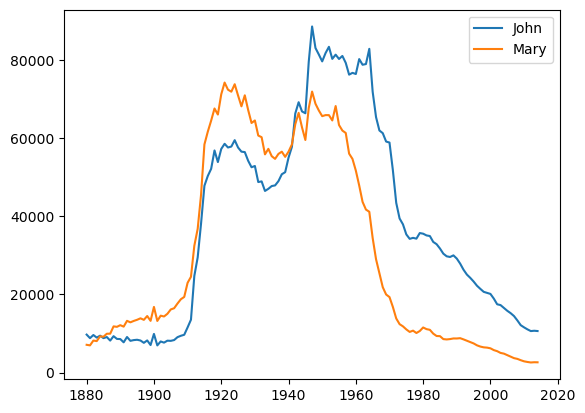

In [17]:
import matplotlib.pyplot as plt

plt.plot(df['Year'].unique(), df[df['Name'] == 'John'].groupby('Year')['Count'].sum().reindex(df['Year'].unique(), fill_value=0), label='John')
plt.plot(df['Year'].unique(), df[df['Name'] == 'Mary'].groupby('Year')['Count'].sum().reindex(df['Year'].unique(), fill_value=0), label='Mary')
plt.legend() #25

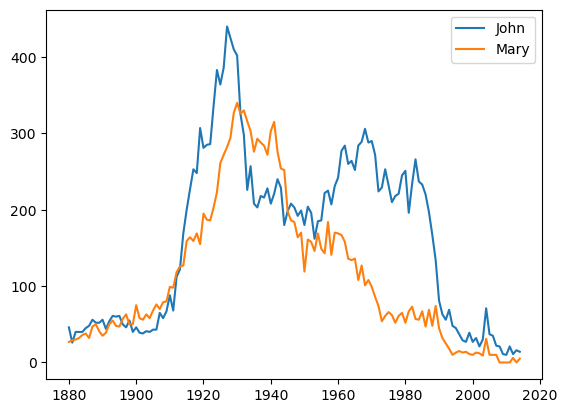

In [18]:
plt.plot(df['Year'].unique(), df[(df['Name'] == 'John') & (df['Gender'] == 'F')].groupby('Year')['Count'].sum().reindex(df['Year'].unique(), fill_value=0), label='John')
plt.plot(df['Year'].unique(), df[(df['Name'] == 'Mary') & (df['Gender'] == 'M')].groupby('Year')['Count'].sum().reindex(df['Year'].unique(), fill_value=0), label='Mary')
plt.legend() #26

In [19]:
df.groupby(['Year', 'Name'])['Count'].sum().reset_index().loc[lambda x: x.groupby(['Year'])['Count'].idxmax()] #27

,Year,Name,Count
955,1880,John,9701
2818,1881,John,8795
4735,1882,John,9597
6727,1883,John,8934
8775,1884,John,9428
...,...,...,...
1521288,2010,Isabella,22913
1568092,2011,Sophia,21839
1599369,2012,Sophia,22285
1630271,2013,Sophia,21172
